In [13]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from scipy.interpolate import make_splrep
from scipy.integrate import quad
from scipy.stats import kurtosis
t_df = pandas.read_csv('/kaggle/input/sample-1/HistoryOutput.csv')
c_df = pandas.read_csv('/kaggle/input/sample-1/cd_query_1.csv')

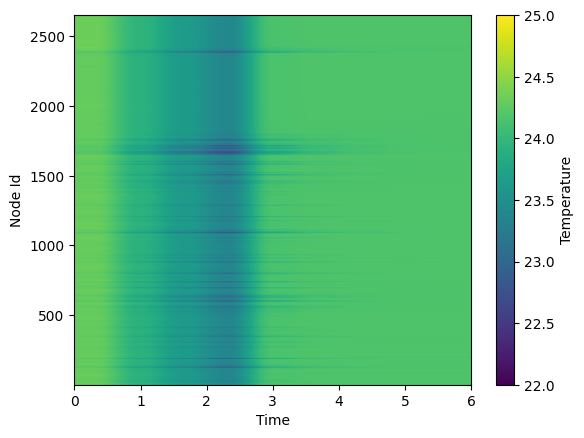

In [14]:
#reformat data
t_df_1 = t_df.drop(columns='Time')

#convert to numpy array
t_df_1 = t_df_1.to_numpy()
t_df_1 = t_df_1.T

#plotting images with the same shape as numpy array
#pixel color corresponds to value at location in array
im = plt.imshow(t_df_1, norm='linear', cmap='viridis', origin='lower', extent=[0, 6, 1, 2653], aspect='auto')
plt.colorbar(im, label='Temperature')
plt.clim(22, 25)

plt.xlabel("Time")
plt.ylabel("Node Id")

plt.show()

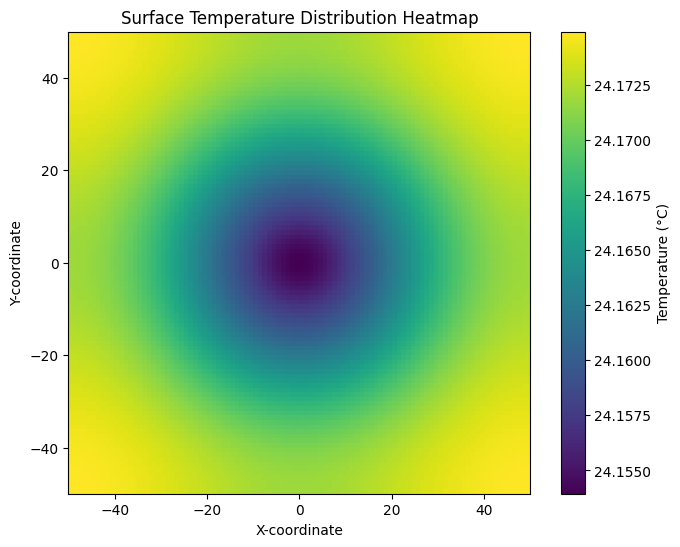

In [15]:
#CODE TO GENERATE HEAT MAP AT SPECFIC TIMESTAMP
t_df_2 = t_df.T
t_df_2 = t_df_2.drop('Time')

c_df_2 = c_df[c_df.z == 2.5]

x = c_df_2['x'].to_numpy()
y = c_df_2['y'].to_numpy()
temperature_1 = t_df_2[3].to_numpy()
temperature_2 = t_df_2[4].to_numpy()
temperature_3 = t_df_2[6].to_numpy()
temperature_4 = t_df_2[8].to_numpy()

grid_x, grid_y = np.mgrid[-50:50:100j, -50:50:100j]

grid_z = griddata((x, y), temperature_4, (grid_x, grid_y), method='linear')

plt.figure(figsize=(8, 6))

heatmap = plt.imshow(grid_z.T, origin='upper', extent=(-50, 50, -50, 50))

plt.colorbar(heatmap, label='Temperature (°C)')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Surface Temperature Distribution Heatmap')

plt.show()

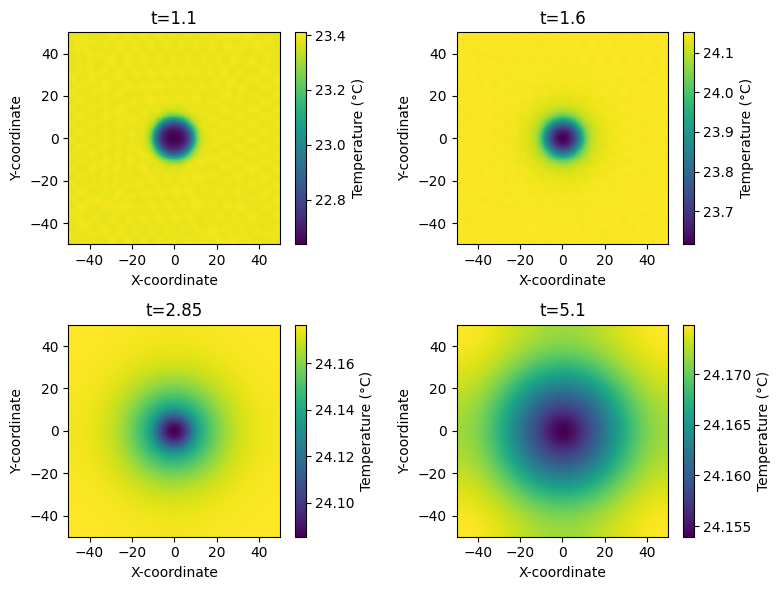

In [16]:
#CREATES 4 HEATMAPS AT USEFUL TIMESTAMPS
#read and reformat temperature data for usage
t_df_3 = t_df.T
t_df_3 = t_df_3.drop('Time')

#read coordinates, excluding those not on sample front face
c_df_3 = c_df[c_df.z == 2.5]

#define variables to 1D numpy arrays from df columns
x = c_df_3['x'].to_numpy()
y = c_df_3['y'].to_numpy()
temperature_1 = t_df_3[3].to_numpy()
temperature_2 = t_df_3[4].to_numpy()
temperature_3 = t_df_3[6].to_numpy()
temperature_4 = t_df_3[8].to_numpy()

#create a uniform grid to plot the heatmap
grid_x, grid_y = np.mgrid[-50:50:100j, -50:50:100j]

#griddata takes the scattered points and interpolates to the regular grid.
grid_z1 = griddata((x, y), temperature_1, (grid_x, grid_y), method='linear')
grid_z2 = griddata((x, y), temperature_2, (grid_x, grid_y), method='linear')
grid_z3 = griddata((x, y), temperature_3, (grid_x, grid_y), method='linear')
grid_z4 = griddata((x, y), temperature_4, (grid_x, grid_y), method='linear')

#2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

#plot on each subplot
h1 = axes[0, 0].imshow(grid_z1.T, origin='upper', extent=(-50, 50, -50, 50))
axes[0, 0].set_title('t=1.1')
plt.colorbar(h1, label='Temperature (°C)')
axes[0, 0].set_xlabel('X-coordinate')
axes[0, 0].set_ylabel('Y-coordinate')

h2 = axes[0, 1].imshow(grid_z2.T, origin='upper', extent=(-50, 50, -50, 50))
axes[0, 1].set_title('t=1.6')
plt.colorbar(h2, label='Temperature (°C)')
axes[0, 1].set_xlabel('X-coordinate')
axes[0, 1].set_ylabel('Y-coordinate')

h3 = axes[1, 0].imshow(grid_z3.T, origin='upper', extent=(-50, 50, -50, 50))
axes[1, 0].set_title('t=2.85')
plt.colorbar(h3, label='Temperature (°C)')
axes[1, 0].set_xlabel('X-coordinate')
axes[1, 0].set_ylabel('Y-coordinate')

h4 = axes[1, 1].imshow(grid_z4.T, origin='upper', extent=(-50, 50, -50, 50))
axes[1, 1].set_title('t=5.1')
plt.colorbar(h4, label='Temperature (°C)')
axes[1, 1].set_xlabel('X-coordinate')
axes[1, 1].set_ylabel('Y-coordinate')

#layout for better spacing
plt.tight_layout()

plt.show()

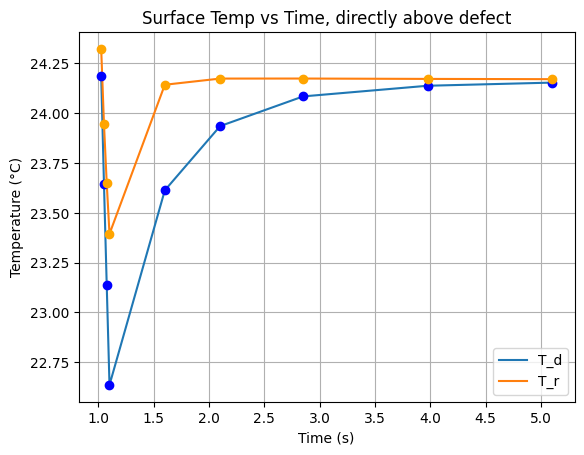

In [17]:
#GRAPHS TEMP VS TIME ABOVE DEFECT AND NOT NEAR DEFECT
x = t_df['Time'].to_numpy()
y_d = t_df['191'].to_numpy()
y_r_1 = t_df['142'].to_numpy()
y_r_2 = t_df['1714'].to_numpy()
y_r_3 = t_df['2563'].to_numpy()
y_r_4 = t_df['2566'].to_numpy()
arrays_to_average = [y_r_1, y_r_2, y_r_3, y_r_4]
y_r = np.mean(arrays_to_average, axis=0)

plt.plot(x, y_d, label="T_d")
plt.plot(x, y_r, label="T_r")
plt.plot(x, y_d, 'o', color="blue") # Plot original points
plt.plot(x, y_r, 'o', color="orange") # Plot original points

plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Surface Temp vs Time, directly above defect")
plt.grid()

plt.legend()

plt.show()

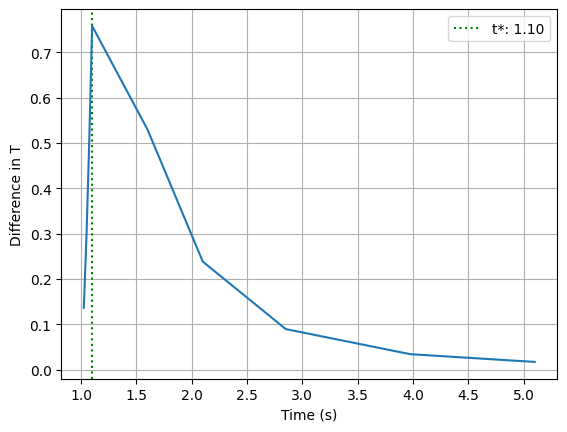

In [53]:
#TIME VS DIFFERENCE IN TEMP, IDENTIFY MAX DIFFERENCE TIMESTAMP
#read and reformat data
y = (y_r - y_d)

max_x = max_temp_difference_time(x, y)
max_diff = max_temp_difference(y)

plt.axvline(x=max_x, color='g', linestyle=':', label=f't*: {max_x:.2f}')

plt.plot(x, y)

plt.xlabel("Time (s)")
plt.ylabel("Difference in T")
plt.grid()
plt.legend()

plt.show()

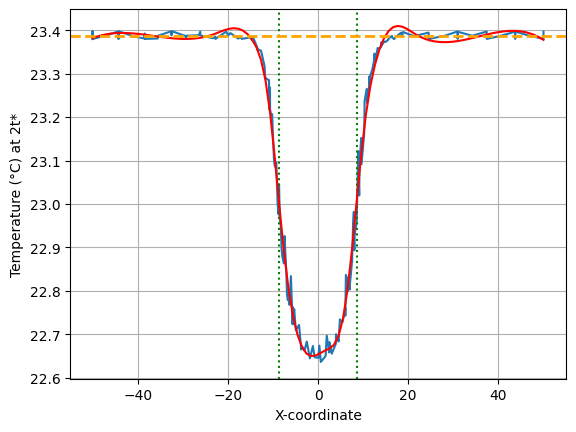

FWHM: 17.17171717171717
12.86271728434149
-0.014860358869251585
0.02043657162054867
Curve depth is: 0.7377141548398356
0.04296100078184926
-1.5757088321091652


In [35]:
#GRAPHING AND ANALYSIS AT t*
t_df_6 = t_df.T
temp = []

c_df_filtered = c_df[(c_df['y'] < 4.5) & (c_df['z'] == 2.5) & (c_df['y'] > -4.5)]

reference = c_df_filtered[(c_df_filtered['x'] < -20) | (c_df_filtered['x'] > 20)]
r_x = reference['x'].to_numpy()
r_id = reference['Node ID'].to_numpy()
r_temp = []

n_id = c_df_filtered['Node ID'].to_numpy()
x_6 = c_df_filtered['x'].to_numpy()

for i in range(len(n_id)):
    temp.append(t_df.loc[3, str(n_id[i])])
temp = np.array(temp)

for i in range(len(r_id)):
    r_temp.append(t_df.loc[3, str(r_id[i])])
r_temp = np.array(r_temp)
r_value = np.mean(r_temp)

sorted_indices = np.argsort(x_6)

x_6 = x_6[sorted_indices]
temp = temp[sorted_indices]

spl = make_splrep(x_6, temp, s=0.1)
x_new = np.linspace(-50, 50, 100)
temp_smoothed = spl(x_new)

fwhm_1 = calculate_fwhm(x_new, temp_smoothed, r_value)

plt.plot(x_6, temp)
plt.axvline(x=fwhm_1[1], color='g', linestyle=':')
plt.axvline(x=fwhm_1[2], color='g', linestyle=':')
plt.plot(x_new, temp_smoothed, color='red')
plt.axhline(y=r_value, color='orange', linestyle='--', linewidth=2)
plt.grid()
plt.xlabel("X-coordinate")
plt.ylabel("Temperature (°C) at 2t*")
plt.show()
print(f"FWHM: {fwhm_1[0]}")

i1, d1_1, d2_1 = calculate_i_d(x_new, temp_smoothed, r_value, fwhm_1, spl)
print(i1)
print(d1_1)
print(d2_1)

depth_1 = curve_depth(x_new, temp_smoothed, r_value)
print(depth_1[0])

d_w_1 = d_w_ratio(x_new, temp_smoothed, r_value)
print(d_w_1)

kurt_1 = calculate_kurtosis(x_new, temp_smoothed, r_value)
print(kurt_1)

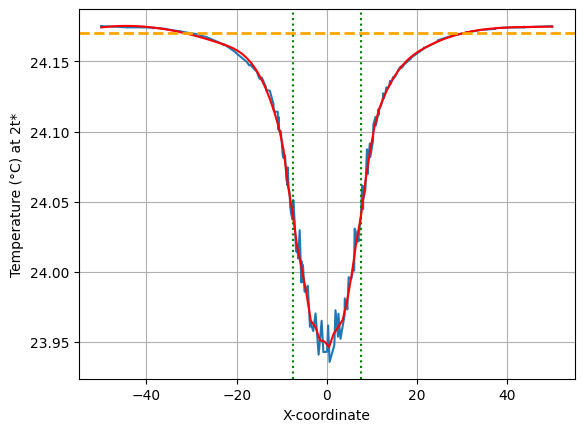

FWHM: 15.151515151515149
4.2220321669968
-0.000736579667332786
0.0007167949664321795
Curve depth is: 0.22426604331938904
0.01480155885907968
-0.6157016478253663


In [36]:
#GRAPHING AND ANALYSIS AT ~2t*
t_df_6 = t_df.T
temp = []

c_df_filtered = c_df[(c_df['y'] < 4.5) & (c_df['z'] == 2.5) & (c_df['y'] > -4.5)]

reference = c_df_filtered[(c_df_filtered['x'] < -20) | (c_df_filtered['x'] > 20)]
r_x = reference['x'].to_numpy()
r_id = reference['Node ID'].to_numpy()
r_temp = []

n_id = c_df_filtered['Node ID'].to_numpy()
x_6 = c_df_filtered['x'].to_numpy()

for i in range(len(n_id)):
    temp.append(t_df.loc[5, str(n_id[i])])
temp = np.array(temp)

for i in range(len(r_id)):
    r_temp.append(t_df.loc[5, str(r_id[i])])
r_temp = np.array(r_temp)
r_value = np.mean(r_temp)

sorted_indices = np.argsort(x_6)

x_6 = x_6[sorted_indices]
temp = temp[sorted_indices]

spl = make_splrep(x_6, temp, s=0.005)
x_new = np.linspace(-50, 50, 100)
temp_smoothed = spl(x_new)

fwhm_2 = calculate_fwhm(x_new, temp_smoothed, r_value)

plt.plot(x_6, temp)
plt.axvline(x=fwhm_2[1], color='g', linestyle=':')
plt.axvline(x=fwhm_2[2], color='g', linestyle=':')
plt.plot(x_new, temp_smoothed, color='red')
plt.axhline(y=r_value, color='orange', linestyle='--', linewidth=2)
plt.grid()
plt.xlabel("X-coordinate")
plt.ylabel("Temperature (°C) at 2t*")
plt.show()
print(f"FWHM: {fwhm_2[0]}")

i2, d1_2, d2_2 = calculate_i_d(x_new, temp_smoothed, r_value, fwhm, spl)
print(i2)
print(d1_2)
print(d2_2)

depth_2 = curve_depth(x_new, temp_smoothed, r_value)
print(depth_2[0])

d_w_2 = d_w_ratio(x_new, temp_smoothed, r_value)
print(d_w_2)

kurt_2 = calculate_kurtosis(x_new, temp_smoothed, r_value)
print(kurt_2)

In [31]:
#feature extraction functions
def max_temp_difference(y):
    #Returns the maximum difference in temperature between above defect and not above defect
    max_index = np.argmax(y)
    return max_index

def max_temp_difference_time(x, y):
    #Returns timestep of max_temp_difference
    max_index = max_temp_difference(y)
    max_x = x[max_index]
    return max_x

def calculate_fwhm(x, y, baseline):
    #returns the width at half max amplitude, as well as 2 x values of half max 
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)

    half_trough_value = min_y + ((baseline - min_y) / 2.0)

    left_indices = np.where(y[:min_idx] <= half_trough_value)[0]
    
    right_indices = np.where(y[min_idx:] <= half_trough_value)[0] + min_idx
    
    x_left = x[left_indices[0]]
    x_right = x[right_indices[-1]]

    fwhm = x_right - x_left
    return fwhm, x_right, x_left

def intersection(x, y, baseline):
    #returns values where curve intersects with baseline
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)
    
    left_intersection = np.where(y[:min_idx] <= baseline)[0]
    right_intersection = np.where(y[min_idx:] <= baseline)[0] + min_idx
    
    x_left = []
    if x[left_intersection[0]] != -50:
        x_left = x[left_intersection]
        x_left = x_left[0]
    elif len(left_intersection) > 1:
        for i in range(len(left_intersection) - 1):
            if abs(x[left_intersection[-i-2]]) - abs(x[left_intersection[-i-1]]) > 2:
                x_left.append(x[left_intersection[-i-1]])
        x_left = x_left[0]
    
    x_right = []
    if x[right_intersection[-1]] != 50:
        x_right = x[right_intersection]
        x_right = x_right[-1]
    elif len(right_intersection) > 1:
        for i in range(len(right_intersection) - 1):
            if abs(x[right_intersection[i+1]]) - abs(x[right_intersection[i]]) > 2:
                x_right.append(x[right_intersection[i]])
        x_right = x_right[0]

    return x_left, x_right

def curve_depth(x, y, baseline):
    #returns depth of curve from baseline to minimum 
    min_y = np.nanmin(y)
    depth = baseline - min_y
    d = f"Curve depth is: {depth}"
    return d, depth

def d_w_ratio(x, y, baseline):
    #returns ratio of depth and width @ half max amplitude
    fwhm = calculate_fwhm(x, y, baseline)
    w = fwhm[0]
    d = curve_depth(x, y, baseline)
    ratio = d[1]/w
    return ratio
    
def calculate_i_d(x, y, baseline, fwhm, spl):
    #returns integral between curve and baseline and derivative at start and end of curve 
    def integrand(z):
        return abs(r_value-spl(z))

    point = intersection(x, y, baseline)
    result_1, error_1 = quad(integrand, point[0], fwhm[2]/2)
    result_2, error_2 = quad(integrand, fwhm[2]/2, fwhm[2])
    result_3, error_3 = quad(integrand, fwhm[2], fwhm[1])
    result_4, error_4 = quad(integrand, fwhm[1], point[1])
    total_integral = result_1 + result_2 + result_3 + result_4
    
    first_derivative_spline = spl.derivative(nu=1)
    derivative_at_start = first_derivative_spline(point[0])
    derivative_at_end = first_derivative_spline(point[1])
    
    return total_integral, derivative_at_start, derivative_at_end

def calculate_kurtosis(x, y, baseline):
    #returns kurtosis of trough
    limit = intersection(x, y, baseline)
    trough_mask = (x >= limit[0]) & (x <= limit[1])
    trough_data = y[trough_mask]
    k = kurtosis(trough_data, fisher=True)
    return k

In [41]:
import pandas
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from scipy.interpolate import make_splrep
from scipy.integrate import quad
from scipy.stats import kurtosis
t_df = pandas.read_csv('/kaggle/input/sample-1/HistoryOutput.csv')
c_df = pandas.read_csv('/kaggle/input/sample-1/cd_query_1.csv')

def max_temp_difference(y):
    #Returns the maximum difference in temperature between above defect and not above defect
    max_index = np.argmax(y)
    return max_index

def max_temp_difference_time(x, y):
    #Returns timestep of max_temp_difference
    max_index = max_temp_difference(y)
    max_x = x[max_index]
    return max_x

def calculate_fwhm(x, y, baseline):
    #returns the width at half max amplitude, as well as 2 x values of half max 
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)

    half_trough_value = min_y + ((baseline - min_y) / 2.0)

    left_indices = np.where(y[:min_idx] <= half_trough_value)[0]
    
    right_indices = np.where(y[min_idx:] <= half_trough_value)[0] + min_idx
    
    x_left = x[left_indices[0]]
    x_right = x[right_indices[-1]]

    fwhm = x_right - x_left
    return fwhm, x_right, x_left

def intersection(x, y, baseline):
    #returns values where curve intersects with baseline
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)
    
    left_intersection = np.where(y[:min_idx] <= baseline)[0]
    right_intersection = np.where(y[min_idx:] <= baseline)[0] + min_idx
    
    x_left = []
    if x[left_intersection[0]] != -50:
        x_left = x[left_intersection]
        x_left = x_left[0]
    elif len(left_intersection) > 1:
        for i in range(len(left_intersection) - 1):
            if abs(x[left_intersection[-i-2]]) - abs(x[left_intersection[-i-1]]) > 2:
                x_left.append(x[left_intersection[-i-1]])
        x_left = x_left[0]
    
    x_right = []
    if x[right_intersection[-1]] != 50:
        x_right = x[right_intersection]
        x_right = x_right[-1]
    elif len(right_intersection) > 1:
        for i in range(len(right_intersection) - 1):
            if abs(x[right_intersection[i+1]]) - abs(x[right_intersection[i]]) > 2:
                x_right.append(x[right_intersection[i]])
        x_right = x_right[0]

    return x_left, x_right

def curve_depth(x, y, baseline):
    #returns depth of curve from baseline to minimum 
    min_y = np.nanmin(y)
    depth = baseline - min_y
    d = f"Curve depth is: {depth}"
    return d, depth

def d_w_ratio(x, y, baseline):
    #returns ratio of depth and width @ half max amplitude
    fwhm = calculate_fwhm(x, y, baseline)
    w = fwhm[0]
    d = curve_depth(x, y, baseline)
    ratio = d[1]/w
    return ratio
    
def calculate_i_d(x, y, baseline, fwhm, spl):
    #returns integral between curve and baseline and derivative at start and end of curve 
    def integrand(z):
        return abs(r_value-spl(z))

    point = intersection(x, y, baseline)
    result_1, error_1 = quad(integrand, point[0], fwhm[2]/2)
    result_2, error_2 = quad(integrand, fwhm[2]/2, fwhm[2])
    result_3, error_3 = quad(integrand, fwhm[2], fwhm[1])
    result_4, error_4 = quad(integrand, fwhm[1], point[1])
    total_integral = result_1 + result_2 + result_3 + result_4
    
    first_derivative_spline = spl.derivative(nu=1)
    derivative_at_start = first_derivative_spline(point[0])
    derivative_at_end = first_derivative_spline(point[1])
    
    return total_integral, derivative_at_start, derivative_at_end

def calculate_kurtosis(x, y, baseline):
    #returns kurtosis of trough
    limit = intersection(x, y, baseline)
    trough_mask = (x >= limit[0]) & (x <= limit[1])
    trough_data = y[trough_mask]
    k = kurtosis(trough_data, fisher=True)
    return k

#TIME VS DIFFERENCE IN TEMP, IDENTIFY MAX DIFFERENCE TIMESTAMP
y = (y_r - y_d)

max_x = max_temp_difference_time(x, y)
max_diff = max_temp_difference(y)

#common code for both t* and 2t*
t_df_6 = t_df.T
c_df_filtered = c_df[(c_df['y'] < 4.5) & (c_df['z'] == 2.5) & (c_df['y'] > -4.5)]
reference = c_df_filtered[(c_df_filtered['x'] < -20) | (c_df_filtered['x'] > 20)]
r_x = reference['x'].to_numpy()
r_id = reference['Node ID'].to_numpy()
n_id = c_df_filtered['Node ID'].to_numpy()
x_6 = c_df_filtered['x'].to_numpy()
sorted_indices = np.argsort(x_6)
x_6 = x_6[sorted_indices]

#GRAPHING AND ANALYSIS AT t*
temp_1 = []
r_temp_1 = []

for i in range(len(n_id)):
    temp_1.append(t_df.loc[3, str(n_id[i])])
temp_1 = np.array(temp_1)

for i in range(len(r_id)):
    r_temp_1.append(t_df.loc[3, str(r_id[i])])
r_temp_1 = np.array(r_temp_1)
r_value_1 = np.mean(r_temp_1)

temp_1 = temp_1[sorted_indices]

spl_1 = make_splrep(x_6, temp_1, s=0.1)
x_smooth_1 = np.linspace(-50, 50, 100)
temp_smoothed_1 = spl_1(x_smooth_1)

fwhm_1 = calculate_fwhm(x_smooth_1, temp_smoothed_1, r_value_1)
i1, d1_1, d2_1 = calculate_i_d(x_smooth_1, temp_smoothed_1, r_value_1, fwhm_1, spl_1)
depth_1 = curve_depth(x_smooth_1, temp_smoothed_1, r_value_1)
d_w_1 = d_w_ratio(x_smooth_1, temp_smoothed_1, r_value_1)
kurt_1 = calculate_kurtosis(x_smooth_1, temp_smoothed_1, r_value_1)

#analysis for 2t*
temp_2 = []
r_temp_2 = []

for i in range(len(n_id)):
    temp_2.append(t_df.loc[5, str(n_id[i])])
temp_2 = np.array(temp_2)

for i in range(len(r_id)):
    r_temp_2.append(t_df.loc[5, str(r_id[i])])
r_temp_2 = np.array(r_temp_2)
r_value_2 = np.mean(r_temp_2)

temp_2 = temp_2[sorted_indices]

spl_2 = make_splrep(x_6, temp_2, s=0.005)
x_smoothed_2 = np.linspace(-50, 50, 100)
temp_smoothed_2 = spl_2(x_smoothed_2)

fwhm_2 = calculate_fwhm(x_smoothed_2, temp_smoothed_2, r_value_2)
i2, d1_2, d2_2 = calculate_i_d(x_smoothed_2, temp_smoothed_2, r_value_2, fwhm_2, spl_2)
depth_2 = curve_depth(x_smoothed_2, temp_smoothed_2, r_value_2)
d_w_2 = d_w_ratio(x_smoothed_2, temp_smoothed_2, r_value_2)
kurt_2 = calculate_kurtosis(x_smoothed_2, temp_smoothed_2, r_value_2)

#create dataframe for sample
out_df = pandas.DataFrame(columns=['t_max', 't*', 'FWHM @ t*', 'FWHM @ 2t*', 'Intg @ t*', 'Intg @ 2t*', 'Derv_1 @ t*', 'Derv_2 @ t*', 'Derv_1 @ 2t*', 'Derv_2 @ 2t*', 'Depth at t*', 'Depth at 2t*', 'Depth/width at t*', 'Depth/width at 2t*', 'Kurtosis at t*', 'Kurtosis at 2t*'])
out_df.loc[1] = [max_diff, max_x, fwhm_1, fwhm_2, i1, i2, d1_1, d2_1, d2_1, d2_2, depth_1, depth_2, d_w_1, d_w_2, kurt_1, kurt_2]
print(out_df)

   t_max   t*                                          FWHM @ t*  \
1      3  1.1  (17.17171717171717, 8.585858585858588, -8.5858...   

                                          FWHM @ 2t*  Intg @ t*  Intg @ 2t*  \
1  (15.151515151515149, 7.575757575757578, -7.575...  35.799016    4.222032   

             Derv_1 @ t*          Derv_2 @ t*         Derv_1 @ 2t*  \
1  -0.014860358869251585  0.02043657162054867  0.02043657162054867   

            Derv_2 @ 2t*                                        Depth at t*  \
1  0.0007167949664321795  (Curve depth is: 0.7377141548398356, 0.7377141...   

                                        Depth at 2t*  Depth/width at t*  \
1  (Curve depth is: 0.22426604331938904, 0.224266...           0.042961   

   Depth/width at 2t*  Kurtosis at t*  Kurtosis at 2t*  
1            0.014802       -1.575709        -0.615702  


In [42]:
out_df = pandas.DataFrame(columns=['t_max', 't*', 'FWHM @ t*', 'FWHM @ 2t*', 'Intg @ t*', 'Intg @ 2t*', 'Derv_1 @ t*', 'Derv_2 @ t*', 'Derv_1 @ 2t*', 'Derv_2 @ 2t*', 'Depth at t*', 'Depth at 2t*', 'Depth/width at t*', 'Depth/width at 2t*', 'Kurtosis at t*', 'Kurtosis at 2t*'])

def feature_extraction(t_df, c_df, out_df, row_num, n_d, n1, n2, n3, n4):
    #data extraction
    x = t_df['Time'].to_numpy()
    y_d = t_df[n_d].to_numpy()
    y_r_1 = t_df[n1].to_numpy()
    y_r_2 = t_df[n2].to_numpy()
    y_r_3 = t_df[n3].to_numpy()
    y_r_4 = t_df[n4].to_numpy()
    arrays_to_average = [y_r_1, y_r_2, y_r_3, y_r_4]
    y_r = np.mean(arrays_to_average, axis=0)
    
    #MAX DIFFERENCE & MAX DIFFERENCE TIMESTAMP
    y = (y_r - y_d)
    
    max_x = max_temp_difference_time(x, y)
    max_diff = max_temp_difference(y)
    
    #common code for both t* and 2t*
    t_df_6 = t_df.T
    c_df_filtered = c_df[(c_df['y'] < 4.5) & (c_df['z'] == 2.5) & (c_df['y'] > -4.5)]
    reference = c_df_filtered[(c_df_filtered['x'] < -20) | (c_df_filtered['x'] > 20)]
    r_x = reference['x'].to_numpy()
    r_id = reference['Node ID'].to_numpy()
    n_id = c_df_filtered['Node ID'].to_numpy()
    x_6 = c_df_filtered['x'].to_numpy()
    sorted_indices = np.argsort(x_6)
    x_6 = x_6[sorted_indices]
    
    #ANALYSIS @ t*
    temp_1 = []
    r_temp_1 = []
    
    for i in range(len(n_id)):
        temp_1.append(t_df.loc[3, str(n_id[i])])
    temp_1 = np.array(temp_1)
    
    for i in range(len(r_id)):
        r_temp_1.append(t_df.loc[3, str(r_id[i])])
    r_temp_1 = np.array(r_temp_1)
    r_value_1 = np.mean(r_temp_1)
    
    temp_1 = temp_1[sorted_indices]
    
    spl_1 = make_splrep(x_6, temp_1, s=0.1)
    x_smooth_1 = np.linspace(-50, 50, 100)
    temp_smoothed_1 = spl_1(x_smooth_1)
    
    fwhm_1 = calculate_fwhm(x_smooth_1, temp_smoothed_1, r_value_1)
    i1, d1_1, d2_1 = calculate_i_d(x_smooth_1, temp_smoothed_1, r_value_1, fwhm_1, spl_1)
    depth_1 = curve_depth(x_smooth_1, temp_smoothed_1, r_value_1)
    d_w_1 = d_w_ratio(x_smooth_1, temp_smoothed_1, r_value_1)
    kurt_1 = calculate_kurtosis(x_smooth_1, temp_smoothed_1, r_value_1)
    
    #ANALYSIS @ 2t*
    temp_2 = []
    r_temp_2 = []
    
    for i in range(len(n_id)):
        temp_2.append(t_df.loc[5, str(n_id[i])])
    temp_2 = np.array(temp_2)
    
    for i in range(len(r_id)):
        r_temp_2.append(t_df.loc[5, str(r_id[i])])
    r_temp_2 = np.array(r_temp_2)
    r_value_2 = np.mean(r_temp_2)
    
    temp_2 = temp_2[sorted_indices]
    
    spl_2 = make_splrep(x_6, temp_2, s=0.005)
    x_smoothed_2 = np.linspace(-50, 50, 100)
    temp_smoothed_2 = spl_2(x_smoothed_2)
    
    fwhm_2 = calculate_fwhm(x_smoothed_2, temp_smoothed_2, r_value_2)
    i2, d1_2, d2_2 = calculate_i_d(x_smoothed_2, temp_smoothed_2, r_value_2, fwhm_2, spl_2)
    depth_2 = curve_depth(x_smoothed_2, temp_smoothed_2, r_value_2)
    d_w_2 = d_w_ratio(x_smoothed_2, temp_smoothed_2, r_value_2)
    kurt_2 = calculate_kurtosis(x_smoothed_2, temp_smoothed_2, r_value_2)
    
    #APPLY TO DATAFRAME
    new_row = pandas.DataFrame([[max_diff, max_x, fwhm_1, fwhm_2, i1, i2, d1_1, d2_1, d2_1, d2_2, depth_1, depth_2, d_w_1, d_w_2, kurt_1, kurt_2]], columns=['t_max', 't*', 'FWHM @ t*', 'FWHM @ 2t*', 'Intg @ t*', 'Intg @ 2t*', 'Derv_1 @ t*', 'Derv_2 @ t*', 'Derv_1 @ 2t*', 'Derv_2 @ 2t*', 'Depth at t*', 'Depth at 2t*', 'Depth/width at t*', 'Depth/width at 2t*', 'Kurtosis at t*', 'Kurtosis at 2t*'])
    out_df = pandas.concat([out_df, new_row], ignore_index=True)
    return out_df

# **Full feature extraction**

In [ ]:
import pandas
import numpy as np
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from scipy.interpolate import make_splrep
from scipy.integrate import quad
from scipy.stats import kurtosis
t_df = pandas.read_csv('/kaggle/input/sample-1/HistoryOutput.csv')
c_df = pandas.read_csv('/kaggle/input/sample-1/cd_query_1.csv')
out_df = pandas.DataFrame(columns=['t_max', 't*', 'FWHM @ t*', 'FWHM @ 2t*',
                                   'Intg @ t*', 'Intg @ 2t*', 'Derv_1 @ t*', 
                                   'Derv_2 @ t*', 'Derv_1 @ 2t*', 'Derv_2 @ 2t*',
                                   'Depth at t*', 'Depth at 2t*', 'Depth/width at t*', 
                                   'Depth/width at 2t*', 'Kurtosis at t*', 'Kurtosis at 2t*'])

In [61]:
def max_temp_difference(y):
    #Returns the maximum difference in temperature between above defect and not above defect
    max_diff = np.max(y)
    return max_diff

def max_temp_difference_time(x, y):
    #Returns timestep of max_temp_difference
    max_index = np.argmax(y)
    max_x = x[max_index]
    return max_x

def calculate_fwhm(x, y, baseline):
    #returns the width at half max amplitude, as well as 2 x values of half max 
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)

    half_trough_value = min_y + ((baseline - min_y) / 2.0)

    left_indices = np.where(y[:min_idx] <= half_trough_value)[0]
    
    right_indices = np.where(y[min_idx:] <= half_trough_value)[0] + min_idx
    
    x_left = x[left_indices[0]]
    x_right = x[right_indices[-1]]

    fwhm = x_right - x_left
    return fwhm, x_right, x_left

def intersection(x, y, baseline):
    #returns values where curve intersects with baseline
    min_y = np.nanmin(y)
    min_idx = np.argmin(y)
    
    left_intersection = np.where(y[:min_idx] <= baseline)[0]
    right_intersection = np.where(y[min_idx:] <= baseline)[0] + min_idx
    
    x_left = []
    if x[left_intersection[0]] != -50:
        x_left = x[left_intersection]
        x_left = x_left[0]
    elif len(left_intersection) > 1:
        for i in range(len(left_intersection) - 1):
            if abs(x[left_intersection[-i-2]]) - abs(x[left_intersection[-i-1]]) > 2:
                x_left.append(x[left_intersection[-i-1]])
        x_left = x_left[0]
    
    x_right = []
    if x[right_intersection[-1]] != 50:
        x_right = x[right_intersection]
        x_right = x_right[-1]
    elif len(right_intersection) > 1:
        for i in range(len(right_intersection) - 1):
            if abs(x[right_intersection[i+1]]) - abs(x[right_intersection[i]]) > 2:
                x_right.append(x[right_intersection[i]])
        x_right = x_right[0]

    return x_left, x_right

def curve_depth(x, y, baseline):
    #returns depth of curve from baseline to minimum 
    min_y = np.nanmin(y)
    depth = baseline - min_y
    return depth

def d_w_ratio(x, y, baseline):
    #returns ratio of depth and width @ half max amplitude
    fwhm = calculate_fwhm(x, y, baseline)
    w = fwhm[0]
    d = curve_depth(x, y, baseline)
    ratio = d/w
    return ratio
    
def calculate_i_d(x, y, baseline, fwhm, spl):
    #returns integral between curve and baseline and derivative at start and end of curve 
    def integrand(z):
        return abs(r_value-spl(z))

    point = intersection(x, y, baseline)
    result_1, error_1 = quad(integrand, point[0], fwhm[2]/2)
    result_2, error_2 = quad(integrand, fwhm[2]/2, fwhm[2])
    result_3, error_3 = quad(integrand, fwhm[2], fwhm[1])
    result_4, error_4 = quad(integrand, fwhm[1], point[1])
    total_integral = result_1 + result_2 + result_3 + result_4
    
    first_derivative_spline = spl.derivative(nu=1)
    derivative_at_start = first_derivative_spline(point[0])
    derivative_at_end = first_derivative_spline(point[1])
    
    return total_integral, derivative_at_start, derivative_at_end

def calculate_kurtosis(x, y, baseline):
    #returns kurtosis of trough
    limit = intersection(x, y, baseline)
    trough_mask = (x >= limit[0]) & (x <= limit[1])
    trough_data = y[trough_mask]
    k = kurtosis(trough_data, fisher=True)
    return k

In [63]:
def feature_extraction(t_df, c_df, out_df, n_d, n1, n2, n3, n4):
    #data extraction
    x = t_df['Time'].to_numpy()
    y_d = t_df[n_d].to_numpy()
    y_r_1 = t_df[n1].to_numpy()
    y_r_2 = t_df[n2].to_numpy()
    y_r_3 = t_df[n3].to_numpy()
    y_r_4 = t_df[n4].to_numpy()
    arrays_to_average = [y_r_1, y_r_2, y_r_3, y_r_4]
    y_r = np.mean(arrays_to_average, axis=0)
    
    #MAX DIFFERENCE & MAX DIFFERENCE TIMESTAMP
    y = (y_r - y_d)
    
    max_x = max_temp_difference_time(x, y)
    max_diff = max_temp_difference(y)
    
    #common code for both t* and 2t*
    t_df_6 = t_df.T
    c_df_filtered = c_df[(c_df['y'] < 4.5) & (c_df['z'] == 2.5) & (c_df['y'] > -4.5)]
    reference = c_df_filtered[(c_df_filtered['x'] < -20) | (c_df_filtered['x'] > 20)]
    r_x = reference['x'].to_numpy()
    r_id = reference['Node ID'].to_numpy()
    n_id = c_df_filtered['Node ID'].to_numpy()
    x_6 = c_df_filtered['x'].to_numpy()
    sorted_indices = np.argsort(x_6)
    x_6 = x_6[sorted_indices]
    
    #ANALYSIS @ t*
    temp_1 = []
    r_temp_1 = []
    
    for i in range(len(n_id)):
        temp_1.append(t_df.loc[3, str(n_id[i])])
    temp_1 = np.array(temp_1)
    
    for i in range(len(r_id)):
        r_temp_1.append(t_df.loc[3, str(r_id[i])])
    r_temp_1 = np.array(r_temp_1)
    r_value_1 = np.mean(r_temp_1)
    
    temp_1 = temp_1[sorted_indices]
    
    spl_1 = make_splrep(x_6, temp_1, s=0.1)
    x_smooth_1 = np.linspace(-50, 50, 100)
    temp_smoothed_1 = spl_1(x_smooth_1)
    
    fwhm_1 = calculate_fwhm(x_smooth_1, temp_smoothed_1, r_value_1)
    i1, d1_1, d2_1 = calculate_i_d(x_smooth_1, temp_smoothed_1, r_value_1, fwhm_1, spl_1)
    depth_1 = curve_depth(x_smooth_1, temp_smoothed_1, r_value_1)
    d_w_1 = d_w_ratio(x_smooth_1, temp_smoothed_1, r_value_1)
    kurt_1 = calculate_kurtosis(x_smooth_1, temp_smoothed_1, r_value_1)
    
    #ANALYSIS @ 2t*
    temp_2 = []
    r_temp_2 = []
    
    for i in range(len(n_id)):
        temp_2.append(t_df.loc[5, str(n_id[i])])
    temp_2 = np.array(temp_2)
    
    for i in range(len(r_id)):
        r_temp_2.append(t_df.loc[5, str(r_id[i])])
    r_temp_2 = np.array(r_temp_2)
    r_value_2 = np.mean(r_temp_2)
    
    temp_2 = temp_2[sorted_indices]
    
    spl_2 = make_splrep(x_6, temp_2, s=0.005)
    x_smoothed_2 = np.linspace(-50, 50, 100)
    temp_smoothed_2 = spl_2(x_smoothed_2)
    
    fwhm_2 = calculate_fwhm(x_smoothed_2, temp_smoothed_2, r_value_2)
    i2, d1_2, d2_2 = calculate_i_d(x_smoothed_2, temp_smoothed_2, r_value_2, fwhm_2, spl_2)
    depth_2 = curve_depth(x_smoothed_2, temp_smoothed_2, r_value_2)
    d_w_2 = d_w_ratio(x_smoothed_2, temp_smoothed_2, r_value_2)
    kurt_2 = calculate_kurtosis(x_smoothed_2, temp_smoothed_2, r_value_2)
    
    #APPLY TO DATAFRAME
    new_row = pandas.DataFrame([[max_diff, max_x, fwhm_1[0], fwhm_2[0],
                                 i1, i2, d1_1, d2_1, d2_1, d2_2, depth_1, 
                                 depth_2, d_w_1, d_w_2, kurt_1, kurt_2]], 
                               columns=['t_max', 't*', 'FWHM @ t*', 'FWHM @ 2t*', 
                                        'Intg @ t*', 'Intg @ 2t*', 'Derv_1 @ t*', 
                                        'Derv_2 @ t*', 'Derv_1 @ 2t*', 'Derv_2 @ 2t*', 
                                        'Depth at t*', 'Depth at 2t*', 'Depth/width at t*',
                                        'Depth/width at 2t*', 'Kurtosis at t*', 
                                        'Kurtosis at 2t*'])
    out_df = pandas.concat([out_df, new_row], ignore_index=True)
    return out_df

In [64]:
feature_extraction(t_df, c_df, out_df, '191', '142', '1714', '2563', '2566')

/tmp/ipykernel_36/2004832159.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pandas.concat([out_df, new_row], ignore_index=True)


,t_max,t*,FWHM @ t*,FWHM @ 2t*,Intg @ t*,Intg @ 2t*,Derv_1 @ t*,Derv_2 @ t*,Derv_1 @ 2t*,Derv_2 @ 2t*,Depth at t*,Depth at 2t*,Depth/width at t*,Depth/width at 2t*,Kurtosis at t*,Kurtosis at 2t*
0,0.75816,1.1,17.171717,15.151515,35.799016,4.222032,-0.014860358869251585,0.02043657162054867,0.02043657162054867,0.0007167949664321795,0.737714,0.224266,0.042961,0.014802,-1.575709,-0.615702
